<a href="https://colab.research.google.com/github/Esteban-Alarcon/Challenge_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [100]:
#Uso e instlación de la biblioteca Altair para la graficación (Nueva para el desarrollador)
#El uso de gráficas es interactivo, pudes pasar el apuntador por encima de la gráfica para conocer con mayor exactitud detalles de la gráfica
!pip install Altair
import altair as alt

In [125]:
#Suma a través de la función incroporada sum(), dónde en cada lista de tiendas busca la columna 'Precio'.
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f'El ingreso total de la tienda 1 fue: ${ingreso_total_tienda1}')
print(f'El ingreso total de la tienda 2 fue: ${ingreso_total_tienda2}')
print(f'El ingreso total de la tienda 3 fue: ${ingreso_total_tienda3}')
print(f'El ingreso total de la tienda 4 fue: ${ingreso_total_tienda4}')

#Para el uso de Altair, se necesitan unir los datos
ingresos_totales = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
'Ingreso Total': [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]})

#Graficación
grafico_ingresos = alt.Chart(ingresos_totales).mark_bar().encode(
    y='Tienda',
    x='Ingreso Total',
    color=alt.Color('Tienda', scale=alt.Scale(scheme='category10'))
).properties(
    title='Ingresos Totales por Tienda')
grafico_ingresos = grafico_ingresos.configure_title(
    fontSize=28
)

grafico_ingresos

El ingreso total de la tienda 1 fue: $1150880400.0
El ingreso total de la tienda 2 fue: $1116343500.0
El ingreso total de la tienda 3 fue: $1098019600.0
El ingreso total de la tienda 4 fue: $1038375700.0


alt.Chart(...)

# 2. Ventas por Categoría del Producto

In [133]:
def conteo_categoria(df, nombre_tienda):
    #Se cuenta la cantidad de elementos que tenemos por categoría y se crea un dataframe llamado Cantidad
    conteo = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
    conteo['Tienda'] = nombre_tienda
    return conteo

conteo_tienda1 = conteo_categoria(tienda, 'Tienda 1')
conteo_tienda2 = conteo_categoria(tienda2, 'Tienda 2')
conteo_tienda3 = conteo_categoria(tienda3, 'Tienda 3')
conteo_tienda4 = conteo_categoria(tienda4, 'Tienda 4')

print(conteo_tienda1, conteo_tienda2, conteo_tienda3, conteo_tienda4)

#Graficación para cada una de las tiendas

grafica_pastel_tienda1 = alt.Chart(conteo_tienda1).mark_arc().encode(
  theta=alt.Theta(field="Cantidad", type="quantitative"),
  color=alt.Color(field="Categoría del Producto", type="nominal"),
  tooltip=['Categoría del Producto', 'Cantidad',alt.Tooltip('Porcentaje:Q', format='.2f')]
).properties(
  title='Distribución de Productos Vendidos - Tienda 1'
)

grafica_pastel_tienda2 = alt.Chart(conteo_tienda2).mark_arc().encode(
  theta=alt.Theta(field="Cantidad", type="quantitative"),
  color=alt.Color(field="Categoría del Producto", type="nominal"),
  tooltip=['Categoría del Producto', 'Cantidad',alt.Tooltip('Porcentaje:Q', format='.2f')]
).properties(
  title='Distribución de Productos Vendidos - Tienda 2'
)

grafica_pastel_tienda3 = alt.Chart(conteo_tienda3).mark_arc().encode(
  theta=alt.Theta(field="Cantidad", type="quantitative"),
  color=alt.Color(field="Categoría del Producto", type="nominal"),
  tooltip=['Categoría del Producto', 'Cantidad', alt.Tooltip('Porcentaje:Q', format='.2f')]
).properties(
  title='Distribución de Productos Vendidos - Tienda 3'
)

grafica_pastel_tienda4 = alt.Chart(conteo_tienda4).mark_arc().encode(
  theta=alt.Theta(field="Cantidad", type="quantitative"),
  color=alt.Color(field="Categoría del Producto", type="nominal"),
  tooltip=['Categoría del Producto', 'Cantidad', alt.Tooltip('Porcentaje:Q', format='.2f')]
).properties(
  title='Distribución de Productos Vendidos - Tienda 4'
)


# Agregar etiquetas con el porcentaje dentro de cada segmento
etiquetas_tienda1 = grafica_pastel_tienda1.mark_text(radius=110, size=12).encode(
  text=alt.Text('Porcentaje:Q', format='.1f')
)

etiquetas_tienda2 = grafica_pastel_tienda2.mark_text(radius=110, size=12).encode(
  text=alt.Text('Porcentaje:Q', format='.1f')
)

etiquetas_tienda3 = grafica_pastel_tienda3.mark_text(radius=110, size=12).encode(
  text=alt.Text('Porcentaje:Q', format='.1f')
)

etiquetas_tienda4 = grafica_pastel_tienda4.mark_text(radius=110, size=12).encode(
  text=alt.Text('Porcentaje:Q', format='.1f')
)


#Ejecución y presentación de las gráficas una al lado de la otra
grafica_pastel_tienda1 | grafica_pastel_tienda2 | grafica_pastel_tienda3 | grafica_pastel_tienda4

    Categoría del Producto  Cantidad    Tienda
0  Artículos para el hogar       171  Tienda 1
1     Deportes y diversión       284  Tienda 1
2        Electrodomésticos       312  Tienda 1
3             Electrónicos       448  Tienda 1
4   Instrumentos musicales       182  Tienda 1
5                 Juguetes       324  Tienda 1
6                   Libros       173  Tienda 1
7                  Muebles       465  Tienda 1     Categoría del Producto  Cantidad    Tienda
0  Artículos para el hogar       181  Tienda 2
1     Deportes y diversión       275  Tienda 2
2        Electrodomésticos       305  Tienda 2
3             Electrónicos       422  Tienda 2
4   Instrumentos musicales       224  Tienda 2
5                 Juguetes       313  Tienda 2
6                   Libros       197  Tienda 2
7                  Muebles       442  Tienda 2     Categoría del Producto  Cantidad    Tienda
0  Artículos para el hogar       177  Tienda 3
1     Deportes y diversión       277  Tienda 3
2        Elec

alt.HConcatChart(...)

# 3. Calificación promedio de la tienda


In [145]:
def calificacion_tienda (df,nombre_tienda):
    suma_calificacion = df['Calificación'].sum()
    cantidad_calificacion = len(df)
    promedio_calificacion = suma_calificacion / cantidad_calificacion
    return promedio_calificacion

promedio_tienda1 = calificacion_tienda(tienda, 'Tienda 1')
promedio_tienda2 = calificacion_tienda(tienda2, 'Tienda 2')
promedio_tienda3 = calificacion_tienda(tienda3, 'Tienda 3')
promedio_tienda4 = calificacion_tienda(tienda4, 'Tienda 4')

print(f'El promedio de la tienda 1 fue: {promedio_tienda1}')
print(f'El promedio de la tienda 2 fue: {promedio_tienda2}')
print(f'El promedio de la tienda 3 fue: {promedio_tienda3}')
print(f'El promedio de la tienda 4 fue: {promedio_tienda4}')

promedios_totales = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
'Promedio': [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]})

grafica_dispersion = alt.Chart(promedios_totales).mark_circle(size=60).encode(
  y='Tienda',
  x='Promedio',
  color='Tienda',
  tooltip=['Promedio', 'Tienda']
).properties(
  title='Evaluaciones promedio de los Clientes por Tienda'
)

grafica_dispersion


El promedio de la tienda 1 fue: 3.976685036032217
El promedio de la tienda 2 fue: 4.037303942348453
El promedio de la tienda 3 fue: 4.048325561678677
El promedio de la tienda 4 fue: 3.9957591178965224


alt.Chart(...)

# 4. Productos más y menos vendidos

In [153]:
def mas_menos_ventas (df,nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    producto_mas_vendido = conteo_productos.idxmax()
    producto_menos_vendido = conteo_productos.idxmin()
    return producto_mas_vendido, producto_menos_vendido

producto_mas_vendido_tienda1, producto_menos_vendido_tienda1 = mas_menos_ventas(tienda, 'Tienda 1')
producto_mas_vendido_tienda2, producto_menos_vendido_tienda2 = mas_menos_ventas(tienda2, 'Tienda 2')
producto_mas_vendido_tienda3, producto_menos_vendido_tienda3 = mas_menos_ventas(tienda3, 'Tienda 3')
producto_mas_vendido_tienda4, producto_menos_vendido_tienda4 = mas_menos_ventas(tienda4, 'Tienda 4')

print(f'El producto más vendido en la tienda 1 es: {producto_mas_vendido_tienda1} y el menos es {producto_menos_vendido_tienda1}')
print(f'El producto más vendido en la tienda 2 es: {producto_mas_vendido_tienda2} y el menos es {producto_menos_vendido_tienda2}')
print(f'El producto más vendido en la tienda 3 es: {producto_mas_vendido_tienda3} y el menos es {producto_menos_vendido_tienda3}')
print(f'El producto más vendido en la tienda 4 es: {producto_mas_vendido_tienda4} y el menos es {producto_menos_vendido_tienda4}')


El producto más vendido en la tienda 1 es: Microondas y el menos es Auriculares con micrófono
El producto más vendido en la tienda 2 es: Iniciando en programación y el menos es Juego de mesa
El producto más vendido en la tienda 3 es: Kit de bancas y el menos es Bloques de construcción
El producto más vendido en la tienda 4 es: Cama box y el menos es Guitarra eléctrica


# 5. Envío promedio por tienda

In [152]:
def costo_envio (df,nombre_tienda):
    suma_envio = df['Costo de envío'].sum()
    cantidad_envios = len(df)
    promedio_envio = suma_envio / cantidad_envios
    return promedio_envio

promedio_envio_tienda1 = round(costo_envio(tienda, 'Tienda 1'))
promedio_envio_tienda2 = round(costo_envio(tienda2, 'Tienda 2'))
promedio_envio_tienda3 = round(costo_envio(tienda3, 'Tienda 3'))
promedio_envio_tienda4 = round(costo_envio(tienda4, 'Tienda 4'))

print(f'El costo promedio de envío de la tienda 1 es: ${promedio_envio_tienda1}')
print(f'El costo promedio de envío de la tienda 2 es: ${promedio_envio_tienda2}')
print(f'El costo promedio de envío de la tienda 3 es: ${promedio_envio_tienda3}')
print(f'El costo promedio de envío de la tienda 4 es: ${promedio_envio_tienda4}')


# Crear un DataFrame con los promedios de envío y el nombre de la tienda
promedios_envio = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
                                'Promedio Envío': [promedio_envio_tienda1, promedio_envio_tienda2, promedio_envio_tienda3, promedio_envio_tienda4]})

# Crear una gráfica de líneas horizontal para el promedio de envío por cada tienda
grafica_lineas_horizontal = alt.Chart(promedios_envio).mark_bar().encode(
  x='Promedio Envío',
  y=alt.Y('Tienda', sort='-x'),
   color=alt.Color('Tienda', scale=alt.Scale(scheme='category20c'))
).properties(
  title='Promedio de Envío por Tienda'
)

grafica_lineas_horizontal

El costo promedio de envío de la tienda 1 es: $26019
El costo promedio de envío de la tienda 2 es: $25216
El costo promedio de envío de la tienda 3 es: $24806
El costo promedio de envío de la tienda 4 es: $23459


alt.Chart(...)

# INFORME FINAL. Análisis de datos para ventas en AluraStore
##Propósito del Análisis
El señor Juan solicita el análisis de datos de venta, rendimiento y reeñas de 4 tiendas en Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basado en los datos.
##Presentación datos y resultados
El análisis se dividió en 5 puntos importantes:


1.   **Ingreso total por cada tienda** 💸
2.   **Ventas por categoría** 📊
3.   **Valoración media por tienda** 😀 🌝 😞
4.   **Productos más y menos vendidos** 👍👎
5.   **Valor de envío promedio por tienda** 🚢

Los cuáles se presentan a continuación con sus respectivos gráficos:

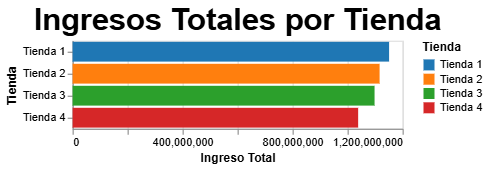

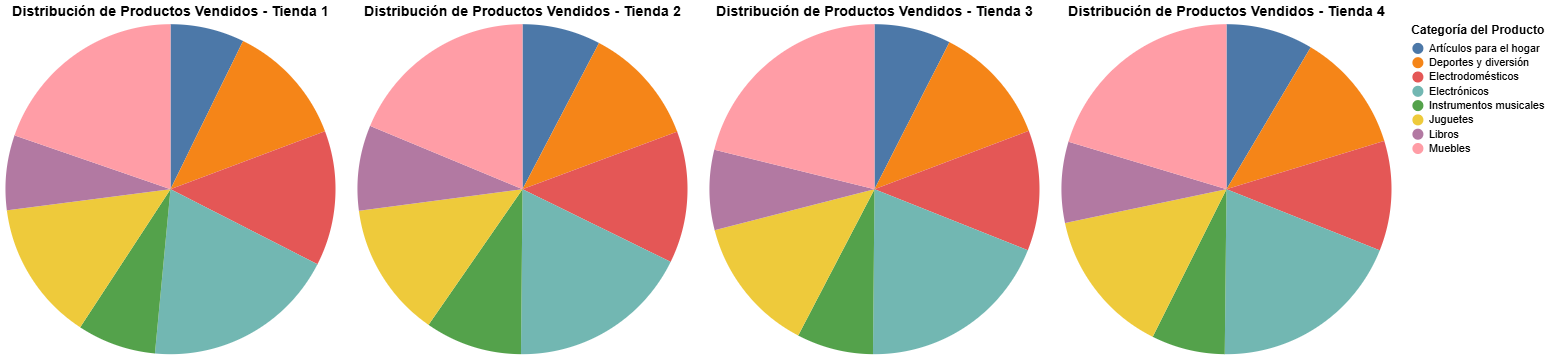


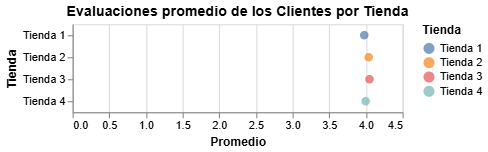

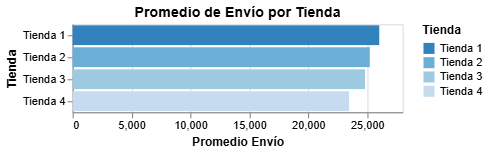

Además de resaltar que:

El producto más vendido en la tienda 1 es: *Microondas* y el menos es *Auriculares con micrófono*

El producto más vendido en la tienda 2 es: *Iniciando en programación* y el menos es *Juego de mesa*

El producto más vendido en la tienda 3 es: *Kit de bancas* y el menos es *Bloques de construcción*

El producto más vendido en la tienda 3 es: *Cama box* y el menos es *Guitarra eléctrica*


##Conclusión
A través de la correspondencia de datos y tomando en cuenta cada uno de los puntos enumerados en la anterior sección, la opción más acertada de venta sería la tienda ***NÚMERO 4***, la facturación total de tienda con respecto a el promedio de calificaciones de los clientes y el costo promedio de envío debido a su localización geográfica hace que los índices de desempeño sean menores en comparación a las demás tiendas.